# NATURAL LANGUAGE PROCESSING 

- This is a project that contains the news of the year 2020 with heading , summary , keywords , hashtags , publish_time,	body_polarity , body_polarity_score , title_polarity , title_polarity_score , country_origin ,	state_origin , city_origin.

- The main aim of the project is to analysis the whole dataset and find the most frequent and least frequent words in them 

- I have used Word2vec for converting the words into vectors and joing the columns [heading , summary , hashtags and keywords] to cleaned them and converted them to the list of lists. 

#### The general use of Word2vec along with data cleaning:

In [1]:
import pandas as pd
from gensim.models import Word2Vec 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn("deprecated", DeprecationWarning)

In [2]:
df= pd.read_csv('data.csv')

In [3]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [4]:
df['Make Model'] = df['Make']+" "+df['Model']

In [5]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP      Make Model  
0           26        19        3916  46135  BMW 1 Series M  
1           28        19        3916  40650    BMW 1 Series  
2           28        20        3916  36350    BMW 1 Series  
3           28        18        3916  29450    BMW 1 Series  
4           28        18        3916  34500    BMW 1 Series

In [6]:
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Make Model']]# For each row, combine all the columns into one column

In [7]:
df1.head()

Engine Fuel Type Transmission Type     Driven_Wheels  \
0  premium unleaded (required)            MANUAL  rear wheel drive   
1  premium unleaded (required)            MANUAL  rear wheel drive   
2  premium unleaded (required)            MANUAL  rear wheel drive   
3  premium unleaded (required)            MANUAL  rear wheel drive   
4  premium unleaded (required)            MANUAL  rear wheel drive   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

       Make Model  
0  BMW 1 Series M  
1    BMW 1 Series  
2    BMW 1 Series  
3    BMW 1 Series  
4    BMW 1 Series

In [8]:
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)# Store them in a pandas dataframe
df2.head()

0    premium unleaded (required),MANUAL,rear wheel ...
1    premium unleaded (required),MANUAL,rear wheel ...
2    premium unleaded (required),MANUAL,rear wheel ...
3    premium unleaded (required),MANUAL,rear wheel ...
4    premium unleaded (required),MANUAL,rear wheel ...
dtype: object

In [9]:
df_clean = pd.DataFrame({'clean': df2})
df_clean.head()

clean
0  premium unleaded (required),MANUAL,rear wheel ...
1  premium unleaded (required),MANUAL,rear wheel ...
2  premium unleaded (required),MANUAL,rear wheel ...
3  premium unleaded (required),MANUAL,rear wheel ...
4  premium unleaded (required),MANUAL,rear wheel ...

In [10]:
sent = [row.split(',') for row in df_clean['clean']]
sent

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Serie

### Word2vec contains parameters : 

##### window: The maximum distance between a target word and words around the target word. The default window is 5.

##### min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

##### workers: The number of partitions during training and the default workers is 3.

##### sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [11]:
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [12]:
model['BMW 1 Series M']

array([-0.01318871, -0.01884141, -0.00564962, -0.02814702, -0.04045631,
       -0.01608975,  0.01170496,  0.0206166 , -0.02256053,  0.01529965,
       -0.00871871,  0.04097516,  0.00034461,  0.00017755, -0.0341983 ,
       -0.03436424, -0.03046084,  0.05117129, -0.04964683, -0.00431171,
        0.00590164, -0.00726785,  0.02579478, -0.01283228, -0.00570465,
        0.01243795,  0.00457296,  0.02966676,  0.02829552, -0.01162074,
       -0.00395491, -0.02720429,  0.03311421, -0.01786823,  0.01964913,
       -0.02618155,  0.0643855 ,  0.0029997 , -0.02182248,  0.00997525,
       -0.01900032,  0.0114219 , -0.02995663, -0.01479495, -0.00208817,
       -0.02521077, -0.00868484, -0.01325147,  0.04522274, -0.02176385],
      dtype=float32)

In [13]:
model.similarity('BMW 1 Series M', 'Nissan Van')

0.9011221

In [14]:
model.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Porsche Boxster', 0.9969022870063782),
 ('Infiniti G37 Coupe', 0.9954109787940979),
 ('Scion FR-S', 0.9952104091644287),
 ('BMW M', 0.9950940608978271),
 ('Porsche 968', 0.9948270916938782)]

## Cosine Similarity

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
from numpy import dot
from numpy.linalg import norm

In [17]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]# only get the unique Maker_Model

In [18]:
 Maker_Model = list(df1['Make Model'].unique())

In [19]:
cosine_distance (model,'Mercedes-Benz SLK-Class',Maker_Model,5)

[('Porsche Boxster', 0.9969023),
 ('Infiniti G37 Coupe', 0.9954109),
 ('Scion FR-S', 0.99521035),
 ('BMW M', 0.995094),
 ('Porsche 968', 0.99482715)]

# Word2vec

In [20]:
import pandas as pd
from gensim.models import Word2Vec 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn("deprecated", DeprecationWarning)

In [21]:
df= pd.read_csv('data.csv')

In [22]:
df['Make Model'] = df['Make']+" "+df['Model']

In [23]:
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Make Model']]# For each row, combine all the columns into one column

In [24]:
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)# Store them in a pandas dataframe
df2.head()

0    premium unleaded (required),MANUAL,rear wheel ...
1    premium unleaded (required),MANUAL,rear wheel ...
2    premium unleaded (required),MANUAL,rear wheel ...
3    premium unleaded (required),MANUAL,rear wheel ...
4    premium unleaded (required),MANUAL,rear wheel ...
dtype: object

In [25]:
df_clean = pd.DataFrame({'clean': df2})
df_clean.head()

clean
0  premium unleaded (required),MANUAL,rear wheel ...
1  premium unleaded (required),MANUAL,rear wheel ...
2  premium unleaded (required),MANUAL,rear wheel ...
3  premium unleaded (required),MANUAL,rear wheel ...
4  premium unleaded (required),MANUAL,rear wheel ...

In [26]:
sent = [row.split(',') for row in df_clean['clean']]
sent

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Serie

In [27]:
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [28]:
model.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Aston Martin DB7', 0.9950953125953674),
 ('Ford Shelby GT500', 0.9942470788955688),
 ('Aston Martin DB9 GT', 0.9942153692245483),
 ('Bentley Continental GTC', 0.9941889047622681),
 ('Bugatti Veyron 16.4', 0.9941667914390564)]

# Main Project : 

In [29]:
import pandas as pd
from gensim.models import Word2Vec 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn("deprecated", DeprecationWarning)
import nltk
import re
nltk.download('stopwords')


pd.set_option('display.max_rows',None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
pd.set_option('display.max_columns',None)

In [31]:
df = pd.read_json('aylien_cleaned_1_Aug_44.json')
df

summary  \
0    However, this restriction will not apply to in...   
1    But leg-spinner Yuzvendra Chahal is utilising ...   
2    So the math was simple and the step logical: L...   
3    Chief Ministers of three states - Bengal, Biha...   
4    Finance Minister, Nirmala Sitharaman, today an...   
5    The enforcement wing of the Excise Department ...   
6    Amid the rising fear among farmers over crop l...   
7    Following complaints that landlords and owners...   
8    Shops selling essential commodities will be al...   
9    In their efforts to contain COVID-19, governme...   
10   | Coronavirus helpline numbers\n\nBriefing the...   
11   The man from Karakurissi near Mannarkkad in th...   
12   Banana growers, who were already reeling under...   
13   A controversial tweet by a Jamia Millia Islami...   
14   Robert Bosch on Thursday said it has developed...   
15   According to a recent report from data analyti...   
16   Bollywood star Hrithik Roshan has bought N95 a...   
17   A significant number of patients have discharg...   
18   Saudi Arabia’s King Salman bin Abdulaziz Al Sa...   
19   A doctor couple are among the three persons wh...   
20   Amid an unprecedented nationwide lockdown and ...   
21   "I'm just doing my bit," says Iragartze Fernan...   
22   Two young siblings, grandchildren of a 65-year...   
23   CBSE has asked the teachers who are staying an...   
24   From permission to go for morning walks to cal...   
25   A view shows empty roads during the lockdown t...   
26   The Eastern Railway on Thursday said it is pro...   
27   China is set to drastically cut its internatio...   
28   The Uttar Pradesh government on Thursday decid...   
29   The government on Thursday announced measures ...   
30   Actor Vijay’s upcoming film Master, directed b...   
31   The Hindu has published an e-book on essential...   
32   The number of Americans filing claims for unem...   
33   IMAGE: Borussia Dortmund are no strangers to a...   
34   Track this blog for latest updates on coronavi...   
35   On March 23, a day after the ‘janata curfew’, ...   
36   New Delhi: Drones were deployed to warn people...   
37   NBC medical drama New Amsterdam has taken a ca...   
38   West Bengal chief minister is leading people i...   
39   West Bengal Chief Minister Mamata Banerjee was...   
40   As the number of confirmed coronavirus cases i...   
41   Chief Minister B.S. Yediyurappa has establishe...   
42   As the poor, the homeless and labourers start ...   
43   In his traditional half-naked attire, 45-year-...   
44   The East Godavari police have arrested at leas...   
45   Focus on public sanitation in the wake of COVI...   
46   IMAGE: In this file photo from 2013, Didi Senf...   
47   New Delhi: As many as 1,600 wholesale fruit an...   
48   Indian table tennis player Takeme Sarkar , who...   
49   Governments stepped up efforts on Thursday to ...   
50   James Bond actress Olga Kurylenko, who says th...   
51   The steps being taken by the government under ...   
52   Five people were admitted to the isolation war...   
53   Finance Minister announced a Rs 1.7 trillion e...   
54   The death toll due to the novel coronavirus (C...   
55   And these sky-high expectations were perhaps l...   
56   The state government on Thursday issued a ster...   
57   With the number of COVID-19 cases rising in th...   
58   The nationwide lockdown due to coronavirus out...   
59   The founder and CEO of UK-based fashion retail...   
60   In a video that has now gone viral on social m...   
61   Seasoned Saurashtra batsman Sheldon Jackson ha...   
62   Actor Courteney Cox says she is revisiting her...   
63   The Central and State governments should esche...   
64   The lockdown to prevent the spread of COVID-19...   
65   With the number of COVID-19 cases rising in th...   
66   International flights will remain banned till ...   
67   To ease pressure due to the coronavirus lockdo...   
68   Staying back home during the ongoing Cor

In [32]:
df = df[:537]

In [33]:
df2 = df.copy()

In [34]:
df1 = df.hashtags.copy()


In [35]:
df1.shape

(537,)

In [36]:
df.isnull().sum()

summary                   0
heading                   0
words_count               0
hashtags                  0
keywords                  0
publish_time              0
body_polarity             1
body_polarity_score       1
title_polarity            0
title_polarity_score      0
country_origin            0
state_origin            380
city_origin             380
dtype: int64

In [37]:
df1[1]

['#India',
 '#Coronavirus',
 '#OneDayInternational',
 '#IndianPremierLeague',
 '#Pandemic',
 '#GovernmentOfIndia',
 '#Lockdown',
 '#LegSpin',
 '#Twitter',
 '#DanceMove',
 '#SocialMedia',
 '#Virus',
 '#Twenty20International',
 '#ODI',
 '#NewZealand',
 '#Whitewash',
 '#ViratKohli',
 '#RoyalChallengersBangalore',
 '#Cricket',
 '#IPL',
 '#BCCI',
 '#BoardOfControlForCricketInIndia']

In [38]:
for i in range(len(df1)):
    df1[i] = ','.join(map(str, df1[i]))

In [39]:
df1

0      #DGCA,#DirectorateGeneralOfCivilAviation,#Coro...
1      #India,#Coronavirus,#OneDayInternational,#Indi...
2      #Lockdown,#ListsOfTransformersCharacters,#Indi...
3      #ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...
4      #Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...
5      #Rumrunning,#Vigil,#SubstanceAbuse,#Stress,#To...
6      #Wheat,#Lockdown,#ManoharLalKhattar,#Haryana,#...
7      #Karnataka,#Society,#ChiefSecretary,#Jayadeva,...
8      #Coronavirus,#Maharashtra,#UddhavThackeray,#CN...
9      #UNICEF,#UNICEF,#Immunization,#Pandemic,#Vacci...
10     #Coronavirus,#India,#Lockdown,#Kashmir,#Financ...
11     #Mannarkkad,#District,#Quarantine,#KSRTC,#Kera...
12     #Banana,#Harvest,#Commodity,#Fruit,#Tiruchirap...
13     #Twitter,#CAA,#ColonialAthleticAssociation,#Un...
14     #RobertBoschGmbH,#Coronavirus,#SARSCoronavirus...
15     #FastmovingConsumerGoods,#FMCG,#Hygiene,#Ecomm...
16     #HrithikRoshan,#Pandemic,#BMC,#BritishMotorCor...
17     #Hospital,#Coronavirus,#

In [40]:
df3 = df1.to_frame()

In [41]:
df3.columns = ['Unlist']

In [42]:
df3.head()

Unlist
0  #DGCA,#DirectorateGeneralOfCivilAviation,#Coro...
1  #India,#Coronavirus,#OneDayInternational,#Indi...
2  #Lockdown,#ListsOfTransformersCharacters,#Indi...
3  #ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...
4  #Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...

In [43]:
df4 = pd.concat([df3,df2],axis=1)

In [44]:
df4.head()

Unlist  \
0  #DGCA,#DirectorateGeneralOfCivilAviation,#Coro...   
1  #India,#Coronavirus,#OneDayInternational,#Indi...   
2  #Lockdown,#ListsOfTransformersCharacters,#Indi...   
3  #ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...   
4  #Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...   

                                             summary  \
0  However, this restriction will not apply to in...   
1  But leg-spinner Yuzvendra Chahal is utilising ...   
2  So the math was simple and the step logical: L...   
3  Chief Ministers of three states - Bengal, Biha...   
4  Finance Minister, Nirmala Sitharaman, today an...   

                                             heading  words_count  \
0  Ban on international passenger flights extende...          223   
1                                 Yuzvendra Chahal's          292   
2  Opinion: COVID-19 Lockdown Is Needed But May N...          812   
3  Amid Lockdown, Chief Ministers Seek Help For M...          401   
4  Coronavirus Pandemic: Auto Industry Welcomes F...          604   

                                            hashtags  \
0  [#DGCA, #DirectorateGeneralOfCivilAviation, #C...   
1  [#India, #Coronavirus, #OneDayInternational, #...   
2  [#Lockdown, #ListsOfTransformersCharacters, #I...   
3  [#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...   
4  [#Crore, #Coronavirus, #FinanceMinister, #Lakh...   

                                            keywords        publish_time  \
0  [flights, passenger, international, passenger ... 2020-03-26 14:30:18   
1  [Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v... 2020-03-26 14:29:28   
2  [Lockdown, COVID-19, Needed, Opinion, Problem,... 2020-03-26 14:29:28   
3  [Chief, Migrant, Ministers, Labourers, Lockdow... 2020-03-26 14:29:28   
4  [Auto, Industry, Announcement, Crisis, Situati... 2020-03-26 14:29:28   

  body_polarity  body_polarity_score title_polarity  title_polarity_score  \
0      negative             0.988144        neutral              0.890838   
1      positive             0.885754        neutral              0.407149   
2      negative             0.606026       negative              0.863666   
3      negative             0.842977        neutral              0.734383   
4      negative             0.849670       negative              0.470863   

  country_origin state_origin city_origin  
0             IN         None        None  
1             IN         None        None  
2             IN         None        None  
3             IN         None        None  
4             IN         None        None

In [45]:
df2 = df2.keywords.copy()

In [46]:
df2.head()

0    [flights, passenger, international, passenger ...
1    [Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...
2    [Lockdown, COVID-19, Needed, Opinion, Problem,...
3    [Chief, Migrant, Ministers, Labourers, Lockdow...
4    [Auto, Industry, Announcement, Crisis, Situati...
Name: keywords, dtype: object

In [47]:
df2[1]

['Yuzvendra Chahal',
 'Chahal',
 'Yuzvendra',
 'TikTok videos',
 'videos',
 'India',
 'time',
 'TikTok',
 'Indian',
 'League',
 'start',
 'International',
 'weeks',
 'cricket',
 'Coronavirus',
 'funny',
 'followers',
 'April',
 'government',
 'Twenty20 International',
 'tweeted',
 'Indian government',
 'Indian Premier League',
 'IPL',
 'dance move',
 'Royal Challengers Bangalore',
 'whitewash',
 'BCCI',
 'social media',
 'Virat Kohli',
 'lockdown',
 'viral',
 'One-day International',
 'ODI',
 'pandemic',
 'New Zealand',
 'leg-spinner',
 'coronavirus']

In [48]:
for i in range(len(df1)):
    df2[i] = ','.join(map(str, df2[i]))

In [49]:
df2.head()

0    flights,passenger,international,passenger flig...
1    Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...
2    Lockdown,COVID-19,Needed,Opinion,Problem,lockd...
3    Chief,Migrant,Ministers,Labourers,Lockdown,Chi...
4    Auto,Industry,Announcement,Crisis,Situation,Ex...
Name: keywords, dtype: object

In [50]:
df3 = df2.to_frame()

In [51]:
df3.head()

keywords
0  flights,passenger,international,passenger flig...
1  Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...
2  Lockdown,COVID-19,Needed,Opinion,Problem,lockd...
3  Chief,Migrant,Ministers,Labourers,Lockdown,Chi...
4  Auto,Industry,Announcement,Crisis,Situation,Ex...

In [52]:
df3.columns = ['Unlist_keywords']

In [53]:
df4 = pd.concat([df3,df4],axis=1)

In [54]:
df4.head()

Unlist_keywords  \
0  flights,passenger,international,passenger flig...   
1  Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...   
2  Lockdown,COVID-19,Needed,Opinion,Problem,lockd...   
3  Chief,Migrant,Ministers,Labourers,Lockdown,Chi...   
4  Auto,Industry,Announcement,Crisis,Situation,Ex...   

                                              Unlist  \
0  #DGCA,#DirectorateGeneralOfCivilAviation,#Coro...   
1  #India,#Coronavirus,#OneDayInternational,#Indi...   
2  #Lockdown,#ListsOfTransformersCharacters,#Indi...   
3  #ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...   
4  #Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...   

                                             summary  \
0  However, this restriction will not apply to in...   
1  But leg-spinner Yuzvendra Chahal is utilising ...   
2  So the math was simple and the step logical: L...   
3  Chief Ministers of three states - Bengal, Biha...   
4  Finance Minister, Nirmala Sitharaman, today an...   

                                             heading  words_count  \
0  Ban on international passenger flights extende...          223   
1                                 Yuzvendra Chahal's          292   
2  Opinion: COVID-19 Lockdown Is Needed But May N...          812   
3  Amid Lockdown, Chief Ministers Seek Help For M...          401   
4  Coronavirus Pandemic: Auto Industry Welcomes F...          604   

                                            hashtags  \
0  [#DGCA, #DirectorateGeneralOfCivilAviation, #C...   
1  [#India, #Coronavirus, #OneDayInternational, #...   
2  [#Lockdown, #ListsOfTransformersCharacters, #I...   
3  [#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...   
4  [#Crore, #Coronavirus, #FinanceMinister, #Lakh...   

                                            keywords        publish_time  \
0  [flights, passenger, international, passenger ... 2020-03-26 14:30:18   
1  [Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v... 2020-03-26 14:29:28   
2  [Lockdown, COVID-19, Needed, Opinion, Problem,... 2020-03-26 14:29:28   
3  [Chief, Migrant, Ministers, Labourers, Lockdow... 2020-03-26 14:29:28   
4  [Auto, Industry, Announcement, Crisis, Situati... 2020-03-26 14:29:28   

  body_polarity  body_polarity_score title_polarity  title_polarity_score  \
0      negative             0.988144        neutral              0.890838   
1      positive             0.885754        neutral              0.407149   
2      negative             0.606026       negative              0.863666   
3      negative             0.842977        neutral              0.734383   
4      negative             0.849670       negative              0.470863   

  country_origin state_origin city_origin  
0             IN         None        None  
1             IN         None        None  
2             IN         None        None  
3             IN         None        None  
4             IN         None        None

In [55]:
df5 = df4[['summary','heading']]

In [56]:
df5 = df5.apply(lambda x: ','.join(x.astype(str)), axis=1)# Store them in a pandas dataframe
df5[0]

'However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA. All international commercial passenger flights will remain suspended till April 14, aviation regulator DGCA announced on Thursday, amid a nationwide lockdown to prevent the spread of the novel coronavirus. The Directorate General of Civil Aviation (DGCA) on March 19 had announced that no international commercial passenger flight operations will take place in India from 1.30 am on March 23 to 5.30 am on March 29. “In continuation of circular-II dated 19.3.2020 issued on the subject cited-above, it has been decided that all scheduled international commercial passenger services shall remain closed till 1830 hrs GMT (0000 hrs of Indian Standard Time) of April 14, 2020," the aviation regulator said. "However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA," it said.,Ban on international passenger f

In [57]:
sum_head = pd.DataFrame({'sum_head': df5})
sum_head.head()

sum_head
0  However, this restriction will not apply to in...
1  But leg-spinner Yuzvendra Chahal is utilising ...
2  So the math was simple and the step logical: L...
3  Chief Ministers of three states - Bengal, Biha...
4  Finance Minister, Nirmala Sitharaman, today an...

In [58]:
df4 = pd.concat([sum_head,df4],axis=1)

In [59]:
df4.head()

sum_head  \
0  However, this restriction will not apply to in...   
1  But leg-spinner Yuzvendra Chahal is utilising ...   
2  So the math was simple and the step logical: L...   
3  Chief Ministers of three states - Bengal, Biha...   
4  Finance Minister, Nirmala Sitharaman, today an...   

                                     Unlist_keywords  \
0  flights,passenger,international,passenger flig...   
1  Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...   
2  Lockdown,COVID-19,Needed,Opinion,Problem,lockd...   
3  Chief,Migrant,Ministers,Labourers,Lockdown,Chi...   
4  Auto,Industry,Announcement,Crisis,Situation,Ex...   

                                              Unlist  \
0  #DGCA,#DirectorateGeneralOfCivilAviation,#Coro...   
1  #India,#Coronavirus,#OneDayInternational,#Indi...   
2  #Lockdown,#ListsOfTransformersCharacters,#Indi...   
3  #ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...   
4  #Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...   

                                             summary  \
0  However, this restriction will not apply to in...   
1  But leg-spinner Yuzvendra Chahal is utilising ...   
2  So the math was simple and the step logical: L...   
3  Chief Ministers of three states - Bengal, Biha...   
4  Finance Minister, Nirmala Sitharaman, today an...   

                                             heading  words_count  \
0  Ban on international passenger flights extende...          223   
1                                 Yuzvendra Chahal's          292   
2  Opinion: COVID-19 Lockdown Is Needed But May N...          812   
3  Amid Lockdown, Chief Ministers Seek Help For M...          401   
4  Coronavirus Pandemic: Auto Industry Welcomes F...          604   

                                            hashtags  \
0  [#DGCA, #DirectorateGeneralOfCivilAviation, #C...   
1  [#India, #Coronavirus, #OneDayInternational, #...   
2  [#Lockdown, #ListsOfTransformersCharacters, #I...   
3  [#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...   
4  [#Crore, #Coronavirus, #FinanceMinister, #Lakh...   

                                            keywords        publish_time  \
0  [flights, passenger, international, passenger ... 2020-03-26 14:30:18   
1  [Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v... 2020-03-26 14:29:28   
2  [Lockdown, COVID-19, Needed, Opinion, Problem,... 2020-03-26 14:29:28   
3  [Chief, Migrant, Ministers, Labourers, Lockdow... 2020-03-26 14:29:28   
4  [Auto, Industry, Announcement, Crisis, Situati... 2020-03-26 14:29:28   

  body_polarity  body_polarity_score title_polarity  title_polarity_score  \
0      negative             0.988144        neutral              0.890838   
1      positive             0.885754        neutral              0.407149   
2      negative             0.606026       negative              0.863666   
3      negative             0.842977        neutral              0.734383   
4      negative             0.849670       negative              0.470863   

  country_origin state_origin city_origin  
0             IN         None        None  
1             IN         None        None  
2             IN         None        None  
3             IN         None        None  
4             IN         None        None

In [60]:
df4.drop(['keywords','hashtags','summary','heading'],axis=1,inplace=True)

In [61]:
df4.head()

sum_head  \
0  However, this restriction will not apply to in...   
1  But leg-spinner Yuzvendra Chahal is utilising ...   
2  So the math was simple and the step logical: L...   
3  Chief Ministers of three states - Bengal, Biha...   
4  Finance Minister, Nirmala Sitharaman, today an...   

                                     Unlist_keywords  \
0  flights,passenger,international,passenger flig...   
1  Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...   
2  Lockdown,COVID-19,Needed,Opinion,Problem,lockd...   
3  Chief,Migrant,Ministers,Labourers,Lockdown,Chi...   
4  Auto,Industry,Announcement,Crisis,Situation,Ex...   

                                              Unlist  words_count  \
0  #DGCA,#DirectorateGeneralOfCivilAviation,#Coro...          223   
1  #India,#Coronavirus,#OneDayInternational,#Indi...          292   
2  #Lockdown,#ListsOfTransformersCharacters,#Indi...          812   
3  #ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...          401   
4  #Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...          604   

         publish_time body_polarity  body_polarity_score title_polarity  \
0 2020-03-26 14:30:18      negative             0.988144        neutral   
1 2020-03-26 14:29:28      positive             0.885754        neutral   
2 2020-03-26 14:29:28      negative             0.606026       negative   
3 2020-03-26 14:29:28      negative             0.842977        neutral   
4 2020-03-26 14:29:28      negative             0.849670       negative   

   title_polarity_score country_origin state_origin city_origin  
0              0.890838             IN         None        None  
1              0.407149             IN         None        None  
2              0.863666             IN         None        None  
3              0.734383             IN         None        None  
4              0.470863             IN         None        None

In [62]:
df_new = df4[['sum_head','Unlist','Unlist_keywords']]

In [63]:
df_new

sum_head  \
0    However, this restriction will not apply to in...   
1    But leg-spinner Yuzvendra Chahal is utilising ...   
2    So the math was simple and the step logical: L...   
3    Chief Ministers of three states - Bengal, Biha...   
4    Finance Minister, Nirmala Sitharaman, today an...   
5    The enforcement wing of the Excise Department ...   
6    Amid the rising fear among farmers over crop l...   
7    Following complaints that landlords and owners...   
8    Shops selling essential commodities will be al...   
9    In their efforts to contain COVID-19, governme...   
10   | Coronavirus helpline numbers\n\nBriefing the...   
11   The man from Karakurissi near Mannarkkad in th...   
12   Banana growers, who were already reeling under...   
13   A controversial tweet by a Jamia Millia Islami...   
14   Robert Bosch on Thursday said it has developed...   
15   According to a recent report from data analyti...   
16   Bollywood star Hrithik Roshan has bought N95 a...   
17   A significant number of patients have discharg...   
18   Saudi Arabia’s King Salman bin Abdulaziz Al Sa...   
19   A doctor couple are among the three persons wh...   
20   Amid an unprecedented nationwide lockdown and ...   
21   "I'm just doing my bit," says Iragartze Fernan...   
22   Two young siblings, grandchildren of a 65-year...   
23   CBSE has asked the teachers who are staying an...   
24   From permission to go for morning walks to cal...   
25   A view shows empty roads during the lockdown t...   
26   The Eastern Railway on Thursday said it is pro...   
27   China is set to drastically cut its internatio...   
28   The Uttar Pradesh government on Thursday decid...   
29   The government on Thursday announced measures ...   
30   Actor Vijay’s upcoming film Master, directed b...   
31   The Hindu has published an e-book on essential...   
32   The number of Americans filing claims for unem...   
33   IMAGE: Borussia Dortmund are no strangers to a...   
34   Track this blog for latest updates on coronavi...   
35   On March 23, a day after the ‘janata curfew’, ...   
36   New Delhi: Drones were deployed to warn people...   
37   NBC medical drama New Amsterdam has taken a ca...   
38   West Bengal chief minister is leading people i...   
39   West Bengal Chief Minister Mamata Banerjee was...   
40   As the number of confirmed coronavirus cases i...   
41   Chief Minister B.S. Yediyurappa has establishe...   
42   As the poor, the homeless and labourers start ...   
43   In his traditional half-naked attire, 45-year-...   
44   The East Godavari police have arrested at leas...   
45   Focus on public sanitation in the wake of COVI...   
46   IMAGE: In this file photo from 2013, Didi Senf...   
47   New Delhi: As many as 1,600 wholesale fruit an...   
48   Indian table tennis player Takeme Sarkar , who...   
49   Governments stepped up efforts on Thursday to ...   
50   James Bond actress Olga Kurylenko, who says th...   
51   The steps being taken by the government under ...   
52   Five people were admitted to the isolation war...   
53   Finance Minister announced a Rs 1.7 trillion e...   
54   The death toll due to the novel coronavirus (C...   
55   And these sky-high expectations were perhaps l...   
56   The state government on Thursday issued a ster...   
57   With the number of COVID-19 cases rising in th...   
58   The nationwide lockdown due to coronavirus out...   
59   The founder and CEO of UK-based fashion retail...   
60   In a video that has now gone viral on social m...   
61   Seasoned Saurashtra batsman Sheldon Jackson ha...   
62   Actor Courteney Cox says she is revisiting her...   
63   The Central and State governments should esche...   
64   The lockdown to prevent the spread of COVID-19...   
65   With the number of COVID-19 cases rising in th...   
66   International flights will remain banned till ...   
67   To ease pressure due to the coronavirus lockdo...   
68   Staying back home during the ongoing Co

In [64]:
df_new = df_new.apply(lambda x: ','.join(x.astype(str)), axis=1)# Store them in a pandas dataframe
df_new[0]

'However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA. All international commercial passenger flights will remain suspended till April 14, aviation regulator DGCA announced on Thursday, amid a nationwide lockdown to prevent the spread of the novel coronavirus. The Directorate General of Civil Aviation (DGCA) on March 19 had announced that no international commercial passenger flight operations will take place in India from 1.30 am on March 23 to 5.30 am on March 29. “In continuation of circular-II dated 19.3.2020 issued on the subject cited-above, it has been decided that all scheduled international commercial passenger services shall remain closed till 1830 hrs GMT (0000 hrs of Indian Standard Time) of April 14, 2020," the aviation regulator said. "However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA," it said.,Ban on international passenger f

In [65]:
df_new = df_new.to_frame()
df_new.columns = ['allwords']
df_new.head()

allwords
0  However, this restriction will not apply to in...
1  But leg-spinner Yuzvendra Chahal is utilising ...
2  So the math was simple and the step logical: L...
3  Chief Ministers of three states - Bengal, Biha...
4  Finance Minister, Nirmala Sitharaman, today an...

In [66]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
corpus = []
for i in range(0, len(df_new)):
    review = re.sub('[^a-zA-Z]', ' ', df_new['allwords'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
corpus

['however restriction apply international cargo operation flight specifically approved dgca international commercial passenger flight remain suspended till april aviation regulator dgca announced thursday amid nationwide lockdown prevent spread novel coronavirus directorate general civil aviation dgca march announced international commercial passenger flight operation take place india march march continuation circular ii dated issued subject cited decided scheduled international commercial passenger service shall remain closed till hr gmt hr indian standard time april aviation regulator said however restriction apply international cargo operation flight specifically approved dgca said ban international passenger flight extended till apr dgca directorategeneralofcivilaviation coronavirus lockdown india gmt greenwichmeantime time ministryofhealthandfamilywelfare primeministeroftheunitedkingdom narendramodi reuters flight passenger international passenger flight passenger flight coronavir

In [68]:
df_clean = pd.DataFrame(corpus,columns = ['text'])

In [69]:
df_clean.head()

text
0  however restriction apply international cargo ...
1  leg spinner yuzvendra chahal utilising self qu...
2  math simple step logical lockdown three week i...
3  chief minister three state bengal bihar odisha...
4  finance minister nirmala sitharaman today anno...

In [70]:
sent = [row.split(' ') for row in df_clean['text']]
sent

[['however',
  'restriction',
  'apply',
  'international',
  'cargo',
  'operation',
  'flight',
  'specifically',
  'approved',
  'dgca',
  'international',
  'commercial',
  'passenger',
  'flight',
  'remain',
  'suspended',
  'till',
  'april',
  'aviation',
  'regulator',
  'dgca',
  'announced',
  'thursday',
  'amid',
  'nationwide',
  'lockdown',
  'prevent',
  'spread',
  'novel',
  'coronavirus',
  'directorate',
  'general',
  'civil',
  'aviation',
  'dgca',
  'march',
  'announced',
  'international',
  'commercial',
  'passenger',
  'flight',
  'operation',
  'take',
  'place',
  'india',
  'march',
  'march',
  'continuation',
  'circular',
  'ii',
  'dated',
  'issued',
  'subject',
  'cited',
  'decided',
  'scheduled',
  'international',
  'commercial',
  'passenger',
  'service',
  'shall',
  'remain',
  'closed',
  'till',
  'hr',
  'gmt',
  'hr',
  'indian',
  'standard',
  'time',
  'april',
  'aviation',
  'regulator',
  'said',
  'however',
  'restriction',
  '

In [71]:
from gensim.models import Word2Vec 
model = Word2Vec(sent, min_count=150,size= 100,workers=3, window =20, sg = 1)

In [72]:
model.most_similar('coronavirus')[:5]

[('one', 0.9500437378883362),
 ('new', 0.8913959264755249),
 ('virus', 0.8890091180801392),
 ('spread', 0.8866443634033203),
 ('said', 0.8718117475509644)]

In [73]:
model.wv.index2entity[:20]  ## top 20 most frequent words

['coronavirus',
 'lockdown',
 'covid',
 'india',
 'pandemic',
 'said',
 'minister',
 'people',
 'virus',
 'government',
 'health',
 'also',
 'lakh',
 'crore',
 'day',
 'worker',
 'hospital',
 'time',
 'country',
 'police']

In [74]:
model['coronavirus']

array([ 0.12822029, -0.00614492, -0.160036  , -0.0130349 ,  0.0462313 ,
        0.07295495, -0.2196622 , -0.11398531, -0.04033719,  0.02510604,
        0.12431514, -0.13978648,  0.01241989, -0.00263941,  0.27947655,
        0.10595445, -0.00820611,  0.02326942, -0.04473757,  0.10192829,
        0.1499401 , -0.23490883,  0.24457563,  0.06043449,  0.04301149,
        0.18697669, -0.09231873,  0.0595133 ,  0.05212424,  0.00985894,
       -0.11744133, -0.10077202,  0.02948018, -0.05619373, -0.02767365,
       -0.05746793, -0.09968603,  0.0519686 ,  0.09068119, -0.03242701,
       -0.07436457, -0.07282558, -0.2256174 ,  0.01246348, -0.05275727,
       -0.08726551, -0.09554086, -0.04757163, -0.00955349, -0.05874795,
       -0.11602696,  0.05061752,  0.03675703, -0.17033803,  0.16268152,
        0.20902692,  0.02400018,  0.18163985, -0.09034749,  0.1175358 ,
       -0.09441015,  0.04162289, -0.08491438,  0.08080135,  0.06481206,
        0.02817453,  0.04455816, -0.17091496,  0.00287323,  0.04

In [75]:
words=list(model.wv.vocab)
print(words)

['thursday', 'lockdown', 'spread', 'coronavirus', 'march', 'india', 'service', 'indian', 'time', 'said', 'country', 'health', 'ministry', 'minister', 'quarantine', 'video', 'one', 'day', 'new', 'pandemic', 'twitter', 'virus', 'government', 'social', 'people', 'patient', 'worker', 'covid', 'hospital', 'infection', 'month', 'case', 'chief', 'state', 'food', 'medical', 'crore', 'daily', 'relief', 'finance', 'per', 'also', 'poor', 'lakh', 'facebook', 'due', 'outbreak', 'police', 'district', 'home', 'official', 'news', 'instagram', 'delhi', 'year', 'package', 'world', 'positive', 'bank', 'r']


In [76]:
X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.shape
df.head()

0         1         2         3         4         5         6  \
0  0.060607  0.019431 -0.121029  0.087108 -0.027263 -0.054692 -0.294247   
1  0.118265  0.010496 -0.151700 -0.050806  0.048255  0.128280 -0.323478   
2  0.050124  0.062986 -0.192000  0.010038  0.054879  0.012536 -0.295290   
3  0.128220 -0.006145 -0.160036 -0.013035  0.046231  0.072955 -0.219662   
4  0.181760  0.018209 -0.129409  0.139910  0.030294  0.037669 -0.311927   

          7         8         9        10        11        12        13  \
0 -0.002877 -0.045463 -0.116913  0.132440 -0.171461  0.026814  0.092341   
1 -0.136293 -0.019309 -0.002229  0.078654 -0.222351 -0.031564 -0.040002   
2 -0.080675 -0.017786 -0.016957  0.120817 -0.203985  0.014789 -0.008004   
3 -0.113985 -0.040337  0.025106  0.124315 -0.139786  0.012420 -0.002639   
4 -0.041723 -0.105312 -0.072237  0.234133 -0.143028 -0.018365  0.103669   

         14        15        16        17        18        19        20  \
0  0.111627  0.075305  0.015321 -0.021438  0.030815  0.137791  0.165714   
1  0.222351 -0.127498 -0.131688 -0.060111 -0.073421  0.161959  0.200937   
2  0.204436  0.060379 -0.094050 -0.092797 -0.048596  0.141300  0.149564   
3  0.279477  0.105954 -0.008206  0.023269 -0.044738  0.101928  0.149940   
4  0.102865  0.201638  0.125448  0.071326 -0.019286  0.091302  0.159952   

         21        22        23        24        25        26        27  \
0 -0.185916  0.189666  0.010256  0.036040  0.179642 -0.016177  0.085675   
1 -0.176208  0.247888 -0.021364  0.028088  0.228197 -0.065201  0.133903   
2 -0.197163  0.188430 -0.043712  0.025402  0.249109 -0.084686  0.101070   
3 -0.234909  0.244576  0.060434  0.043011  0.186977 -0.092319  0.059513   
4 -0.225867  0.352143  0.138945  0.177419  0.128073 -0.065105  0.112440   

         28        29        30        31        32        33        34  \
0 -0.022764  0.074428 -0.033066 -0.053983  0.036256 -0.084127 -0.082618   
1  0.092614  0.065963 -0.219893  0.013216  0.063274 -0.062766 -0.018615   
2 -0.007287 -0.010232 -0.138113 -0.100461  0.045495 -0.057810 -0.041935   
3  0.052124  0.009859 -0.117441 -0.100772  0.029480 -0.056194 -0.027674   
4  0.103424  0.119391 -0.032163 -0.118736 -0.112517 -0.026041  0.000761   

         35        36        37        38        39        40        41  \
0 -0.033539 -0.036377 -0.022168  0.012625 -0.033340 -0.045814 -0.178433   
1 -0.020886 -0.070714 -0.011238  0.081746 -0.040765 -0.014848 -0.163330   
2  0.020934 -0.110149  0.002906  0.128220  0.033738 -0.027807 -0.177263   
3 -0.057468 -0.099686  0.051969  0.090681 -0.032427 -0.074365 -0.072826   
4 -0.102120 -0.033387 -0.040826 -0.002322 -0.003727 -0.000259  0.044045   

         42        43        44        45        46        47        48  \
0 -0.250796 -0.016746  0.120742 -0.242341 -0.050435 -0.051878  0.029991   
1 -0.327548 -0.111122 -0.087797 -0.153527 -0.103742 -0.062302  0.015903   
2 -0.133344 -0.079337 -0.042354 -0.144922 -0.138432 -0.133967  0.071188   
3 -0.225617  0.012463 -0.052757 -0.087266 -0.095541 -0.047572 -0.009553   
4 -0.279152  0.112637  0.047829 -0.142822 -0.055960  0.072104  0.028790   

         49        50        51        52        53        54        55  \
0 -0.121668 -0.098342 -0.006240 -0.016272 -0.144972  0.089453  0.159273   
1 -0.091923 -0.144855  0.018949 -0.017569 -0.132458  0.065833  0.143991   
2 -0.071718 -0.131772  0.061780 -0.006278 -0.178699  0.178366  0.219949   
3 -0.058748 -0.116027  0.050618  0.036757 -0.170338  0.162682  0.209027   
4 -0.130287 -0.123563  0.033054  0.087892 -0.375691  0.205327 -0.019057   

         56        57        58        59        60        61        62  \
0  0.014325  0.212481 -0.027567  0.179213 -0.056038  0.014749 -0.121057   
1  0.039087  0.038555 -0.086244  0.052049  0.018521  0.007207 -0.088562   
2  0.018047  0.075074 -0.100012  0.167726 -0.026226 -0.005586 -0.117098   
3  0.024000  0.181640 -0.090347  0.117536 -0.094410  0.041623 -0.084914   
4  0.136908  0.324877  0.01

In [77]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

In [78]:
model.wv.index2entity[:20]

['coronavirus',
 'lockdown',
 'covid',
 'india',
 'pandemic',
 'said',
 'minister',
 'people',
 'virus',
 'government',
 'health',
 'also',
 'lakh',
 'crore',
 'day',
 'worker',
 'hospital',
 'time',
 'country',
 'police']

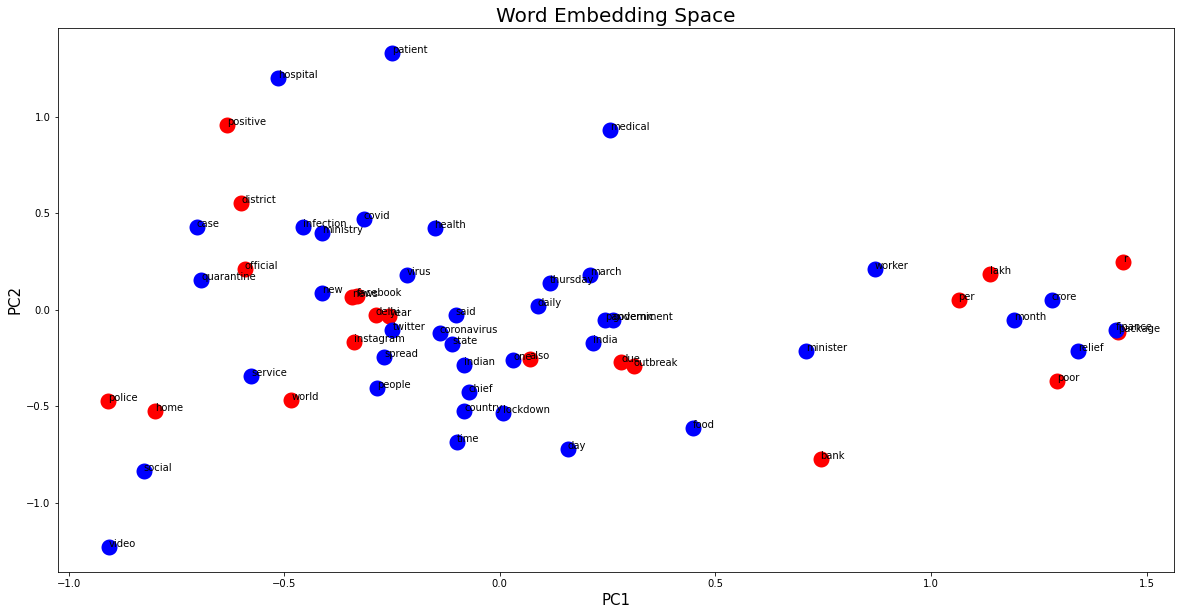

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(neww_X[40:,0],neww_X[40:,1],linewidths=10,color='red')
plt.scatter(neww_X[:40,0],neww_X[:40,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))
#   plt.annotate(word,xy=(neww_X[i+19,0],neww_X[i+19,1]))  

### Words with least frequency

In [80]:
for word in model.wv.vocab:
    if(model.wv.vocab[word].count <180):
        print((word, model.wv.vocab[word].count))
        
    

('spread', 151)
('ministry', 153)
('video', 152)
('one', 158)
('patient', 175)
('daily', 160)
('relief', 156)
('finance', 167)
('poor', 157)
('facebook', 155)
('news', 152)
('bank', 164)


In [111]:
vocab1 = model.wv.index2entity[-20:]  #### Least 20 words
vocab1

['outbreak',
 'service',
 'positive',
 'per',
 'official',
 'package',
 'world',
 'due',
 'patient',
 'finance',
 'bank',
 'daily',
 'one',
 'poor',
 'relief',
 'facebook',
 'ministry',
 'video',
 'news',
 'spread']